# FAMD - Reducción de dimensionalidad

Se aplicará el procedimiento FAMD ( Análisis Factorial de Datos Mixtos) al dataframe sin outliers y con las variables numéricas estandarizadas, con el objetivo de reducir la dimensionalidad del dataframe. Fuente: https://www.matthewunrue.com/Projects/WGU/Data_Mining_II/Project.html#analysis

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
!pip install prince

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import prince
import pprint

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Se carga el archivo T2_ECV_sindum_conout_ord.csv



In [4]:
dff=pd.read_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Data/Modeling/T2_ECV_sindum_conout_ord.csv', sep=";")

A continuación, se ajustará el tipo de cada variable, según su naturaleza: ordinal, nominal y numérica. Para esto se utiliza la función forzar_tipos, creada directamente por el equipo de trabajo

In [5]:
def forzar_tipos(df, info, estandarizar=0):
  from sklearn.preprocessing import StandardScaler
  list_float = list(info.campo[info['tipo'] == 'float64'])
  list_obj = list(info.campo[info['tipo'] == 'object'])
  list_int =  list(info.campo[info['tipo'] == 'int64'])
  df1 = pd.DataFrame()
  df1[list_obj] = df[list_obj].astype(object)
  df1[list_float] = df[list_float].astype(float) 
  df1[list_int] = df[list_int].astype(int)
  if estandarizar == 1:
    df1[list_float] = StandardScaler().fit_transform(df1[list_float])
  return df1

In [6]:
#Función para forzar tipos, con dummies -> info_condum.csv | sin dummies -> info_sindum.csv
infoTipos = pd.read_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Docs/metadata_directory/info_sindum.csv', sep=';')

In [7]:
dff = forzar_tipos(dff, infoTipos, 1)
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 92 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   p_7       9193 non-null   object 
 1   p_10      9193 non-null   object 
 2   p_6       9193 non-null   object 
 3   p_5       9193 non-null   object 
 4   p_146     9193 non-null   object 
 5   p_147     9193 non-null   object 
 6   p_148     9193 non-null   object 
 7   p_158     9193 non-null   object 
 8   p_162     9193 non-null   object 
 9   p_165     9193 non-null   object 
 10  p_171     9193 non-null   object 
 11  p_174     9193 non-null   object 
 12  p_178     9193 non-null   object 
 13  p_184     9193 non-null   object 
 14  p_284     9193 non-null   object 
 15  p_285     9193 non-null   object 
 16  p_286     9193 non-null   object 
 17  p_12      9193 non-null   float64
 18  p_15a     9193 non-null   float64
 19  p_15b     9193 non-null   float64
 20  p_19a     9193 non-null   floa

In [8]:
dff.shape

(9193, 92)

Se aplica el modelo con 92 componentes, igual al número de variables que se tienen en el dataframe, y conocer el total de variabilidad del total de componentes. Asimismo, se corre con 100 iteraciones

In [9]:
famd92 = prince.FAMD(
     n_components=92,
     n_iter=100,
     copy=True,
     check_input=True,
     engine='auto',    
     random_state=42)

In [10]:
famd_1 = famd92.fit(dff)

In [11]:
# Obtenemos los eigenvalues del modelo
eigenvalues_1 = famd92.eigenvalues_
eigenvalues_1[0:20]

[392195.36451919697,
 25437.4212068195,
 19852.156127426173,
 14911.184710923138,
 12401.43578044769,
 10825.300508943883,
 8781.880680991415,
 8551.787892411985,
 7990.447252639747,
 6225.889033652807,
 5579.033076422953,
 5298.551649638296,
 4799.646490975285,
 4619.669567072375,
 4320.110617380094,
 3890.895626162558,
 3741.7583497555656,
 3453.7090237420744,
 3341.1507932753584,
 3048.288460283221]

Se presenta la inercia explicada por cada coordenada

In [12]:
eigfamd_1=famd92.explained_inertia_
eigfamd_1[0:20]


[0.6170022917559159,
 0.040018186344984046,
 0.031231439570772,
 0.023458296481178892,
 0.019509955980689588,
 0.017030377784176813,
 0.013815666874954835,
 0.013453684580635625,
 0.012570582707109403,
 0.009794577268120108,
 0.008776942578490187,
 0.008335688808616445,
 0.007550810520620108,
 0.00726767057416151,
 0.006796404018773435,
 0.0061211623989193276,
 0.005886539428701009,
 0.0054333798292576264,
 0.005256303064877473,
 0.004795571636175723]

In [13]:
#De los datos anteriores vemos que la primera coordenada corresponde con 61.7%

In [14]:
eigfamd_1_df=pd.DataFrame(eigfamd_1)
eigfamd_1_df.head()

,0
0,0.617002
1,0.040018
2,0.031231
3,0.023458
4,0.019510


Se identifica el índice de la coordenada a partir de la cual se obtiene una explicación del 85% en términos de la inercia

In [15]:
eigfamd_1_df['Acum']= eigfamd_1_df[0].cumsum()
filter = eigfamd_1_df['Acum']>= 0.85
eigfamd_1_df[filter]

,0,Acum
17,0.005433,0.854054
18,0.005256,0.859310
19,0.004796,0.864106
20,0.004402,0.868508
21,0.004235,0.872743
...,...,...
87,0.000391,0.955436
88,0.000383,0.955819
89,0.000372,0.956191
90,0.000367,0.956558


Visualización de las coordenadas vs lo explicado

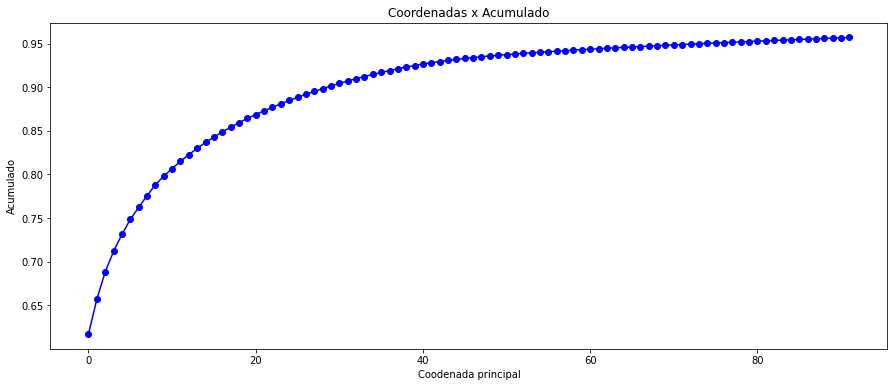

In [16]:
plt.rcParams["figure.figsize"] = (15, 6)
plt.plot(eigfamd_1_df['Acum'], 'bo-')
plt.title("Coordenadas x Acumulado")
plt.xlabel("Coodenada principal")
plt.ylabel("Acumulado")
plt.show()

Se determina la correlación de cada variable con cada componente, para identificar las de mayor asociación

In [17]:
corr_1=famd92.column_correlations(dff)
corr_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91
p_10_1,-0.369830,0.351227,0.234060,-0.010124,0.302766,0.283537,0.256254,0.096757,0.007897,-0.131734,-0.314998,0.318459,0.154673,-0.051810,-0.297817,-0.133139,0.121873,-0.331333,0.047401,0.140429,0.024891,0.037058,-0.034202,0.081412,0.076486,0.168589,0.047953,0.013274,-0.000204,-0.037522,-0.092646,0.073811,-0.006035,-0.000998,-0.047589,-0.001372,-0.025719,-0.018863,0.017245,0.014853,...,-0.003208,-0.001537,0.000021,0.000809,0.004419,0.001984,0.000119,-0.001940,0.001315,-0.013923,-0.004561,0.004226,-0.002774,0.033338,0.005455,0.015377,0.001314,-0.004751,-0.005988,-0.002048,0.000106,-0.002267,-0.005122,0.006327,-0.002787,0.010915,0.005983,-0.006051,0.000458,0.002513,-0.003530,0.002570,0.007133,-0.002320,-0.000641,-0.001300,-0.002665,0.004347,0.002639,0.003482
p_10_2,-0.014857,0.330847,0.143188,0.044920,-0.814285,0.061331,-0.237455,-0.206428,0.015087,-0.024987,0.168998,-0.211598,-0.118498,0.053748,0.014357,-0.001727,0.009683,-0.025090,0.010200,0.005000,0.053948,-0.002428,0.009123,-0.009614,0.035336,0.032565,0.016866,-0.012774,-0.004101,-0.036682,-0.009448,-0.004718,-0.019437,0.005442,-0.008944,-0.003368,-0.009509,-0.011618,0.000269,0.010572,...,0.001550,-0.003919,-0.001621,0.001795,0.001693,-0.000170,-0.002290,-0.001871,0.000034,-0.012133,-0.003414,0.002910,-0.005152,0.019865,0.005326,0.012580,-0.001557,-0.001657,-0.001233,-0.000049,-0.002842,-0.004164,-0.002102,0.005134,-0.003460,0.009090,0.002203,-0.004090,0.001810,0.000402,-0.000632,0.001506,0.001908,0.000790,-0.000248,-0.001228,-0.000053,0.000424,0.003044,-0.001810
p_10_3,0.173295,-0.239871,-0.130470,0.023301,0.529971,-0.568729,0.215760,-0.374132,0.208624,0.087456,0.171010,-0.186200,-0.055823,-0.014485,0.040029,0.006343,0.034743,-0.003174,-0.017853,-0.001928,0.024662,0.000962,-0.015878,-0.032605,0.008243,-0.013953,0.006848,0.005582,-0.011754,-0.029925,0.033993,-0.016368,0.040518,-0.010925,0.047129,-0.032986,0.007292,-0.011861,-0.032783,0.001919,...,0.001143,0.001714,0.003141,-0.000195,0.000444,-0.001693,-0.001599,-0.000389,-0.003259,-0.010879,-0.006181,-0.001047,-0.003157,0.020214,0.001677,0.009092,0.002190,-0.003525,-0.001139,0.001644,-0.000901,-0.003659,-0.002809,0.005360,-0.001638,0.004918,0.002068,-0.004648,0.001403,0.002075,-0.000229,-0.000199,0.000939,-0.000197,-0.002428,-0.000493,0.003209,-0.003535,-0.000790,-0.000650
p_10_4,0.073110,-0.227146,-0.098079,-0.008769,0.092373,0.177923,-0.147617,0.313387,-0.180994,-0.081446,-0.134781,0.198830,0.135869,0.208184,0.657347,-0.356591,-0.063017,0.082811,-0.032791,-0.098851,-0.017095,-0.002397,-0.006380,-0.053200,-0.040305,-0.057247,-0.031994,0.023368,0.004624,0.074305,-0.024485,-0.053749,-0.006696,0.057585,-0.005502,-0.060799,0.020800,-0.003479,-0.023354,-0.009120,...,-0.001629,0.003339,-0.001321,-0.000696,-0.002696,-0.002013,-0.002800,-0.001279,-0.003533,-0.012129,-0.007210,0.001263,-0.000733,0.023549,0.004982,0.008221,0.000814,-0.000518,0.002553,0.000451,0.003857,-0.006731,-0.002426,0.007893,-0.002683,-0.000222,0.006594,0.001208,-0.001199,0.000305,-0.001000,0.002504,-0.002025,-0.000119,-0.000765,-0.000987,0.001883,-0.000490,-0.003766,-0.000880
p_10_5,0.046878,-0.225193,-0.085962,-0.031399,0.064198,0.165264,-0.100832,0.362556,-0.161688,0.105929,0.015766,0.075417,-0.117146,-0.113813,-0.134138,0.694796,0.060224,-0.115498,-0.153696,-0.104421,-0.122149,-0.050793,0.056425,0.022681,-0.093226,-0.110495,-0.033636,-0.025034,0.016864,0.041295,0.107634,0.043502,-0.031898,-0.081507,-0.010163,0.169498,-0.020903,0.067399,0.105836,-0.020677,...,0.001354,0.001955,0.001343,-0.003317,-0.000034,-0.000852,-0.004270,0.000970,-0.002412,-0.004549,-0.004665,0.000826,0.001964,0.010202,0.004756,0.002338,0.000164,0.002284,0.001985,-0.004330,-0.001883,-0.000320,0.001806,-0.002324,0.000789,-0.003320,-0.003385,0.003169,-0.000201

In [18]:
#Identficación de variables en la coordenada 0
maxvar = pd.DataFrame()
maxvar = corr_1[[0]].copy()
maxvar.columns = ['cord_0']
maxvar['cord_0'] = np.abs(maxvar['cord_0'].values)
maxvar = maxvar.sort_values(by=['cord_0'], ascending= False)
maxvar.iloc[0:15,:]

,cord_0
p_148_4,0.537266
p_184_6,0.535162
p_165_2,0.529889
p_165_1,0.529889
p_147_10,0.525381
p_171_2,0.522053
p_171_1,0.522053
p_148_3,0.500779
p_184_5,0.383094
p_147_7,0.376983


Se grafican las observaciones, considerando las dos primeras coordenadas (componentes)

In [19]:
c_t =famd92.transform(dff)
c_1 =np.array(c_t)

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from sklearn.decomposition import PCA
import imageio
plt.set_cmap("Spectral_r")

<Figure size 1080x432 with 0 Axes>

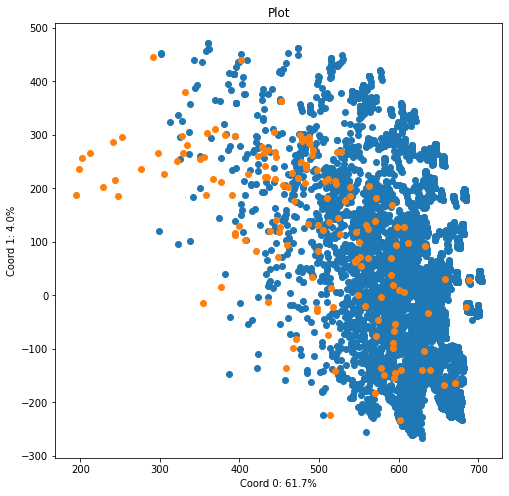

In [21]:
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(c_1[0:9040,0],c_1[0:9040,1], cmap="Spectral_r")
plt.title("Plot")
plt.xlabel("Coord 0: 61.7%")
plt.ylabel("Coord 1: 4.0%")
plt.scatter(c_1[9040:,0],c_1[9040:,1], cmap="Spectral_r") #Los outliers calculados con Gower
plt.show()


A continuación, se grafican las primeras tres componentes, para observar, de una mejor manera, los outliers detectados

In [22]:
# Componentes 0, 1 y 2 sin outliers
x1 = c_1[0:9040,0]
y1 = c_1[0:9040,1]
z1 = c_1[0:9040,2]

# Componentes 0, 1, 2 solo outliers
x2 = c_1[9040:,0]
y2 = c_1[9040:,1]
z2 = c_1[9040:,2]

<Figure size 480x480 with 0 Axes>

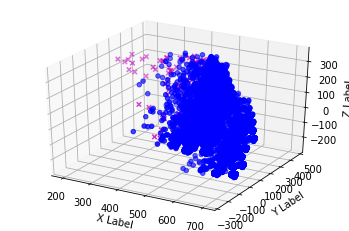

In [23]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c='b', marker='o')
ax.scatter(x2, y2, z2, c='m', marker='x')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
 
plt.show()


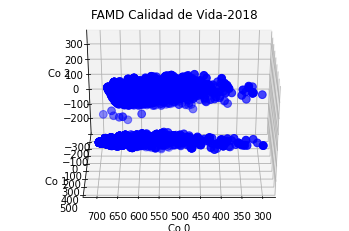

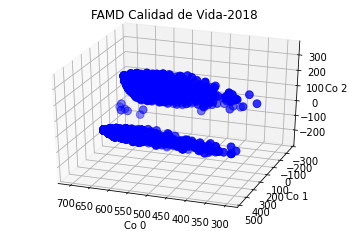

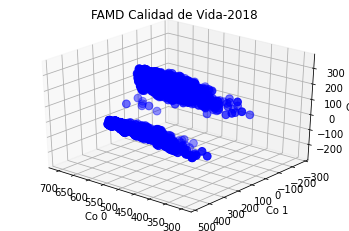

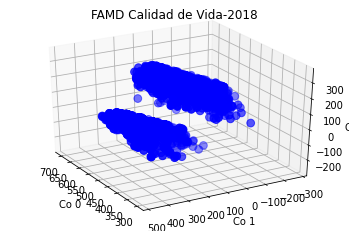

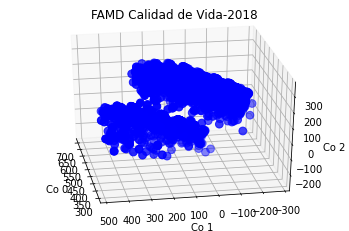

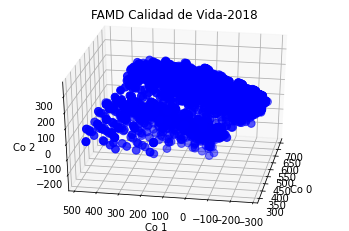

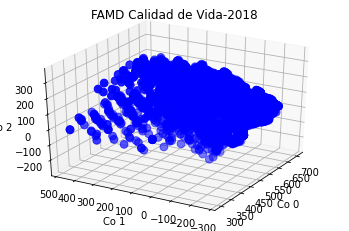

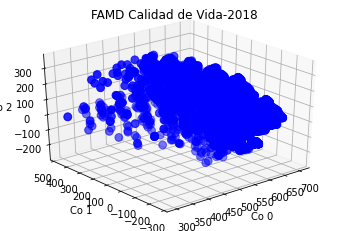

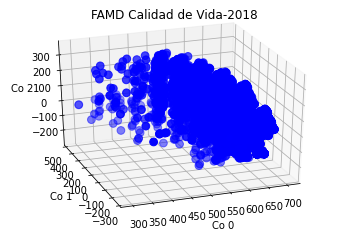

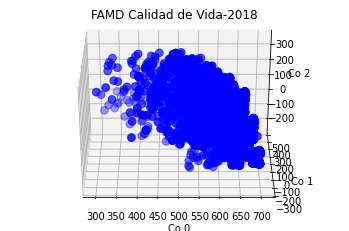

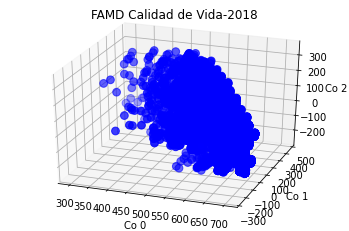

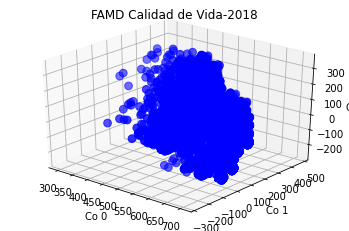

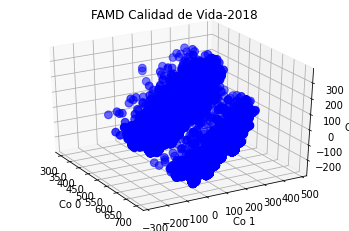

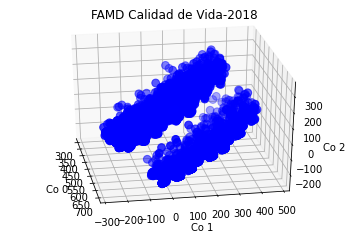

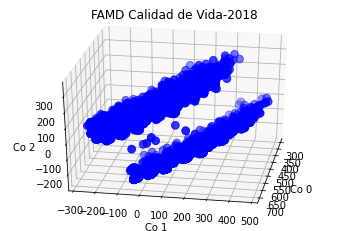

In [24]:
#https://pierpaolo28.github.io/blog/blog11/
for angle in range(90,380,20):
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, y1, z1, c='b', cmap="Set2_r", s=60)
    #ax.scatter(x2, y2, z2, c='m', cmap="Set2_r", s=60)

    # make simple, bare axis lines through space:
   # xAxisLine = ((min(x1), max(x1)), (0, 0), (0,0))
   # ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
   # yAxisLine = ((0, 0), (min(y1), max(y1)), (0,0))
   # ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
   # zAxisLine = ((0, 0), (0,0), (min(z1), max(z1)))
   # ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
    
    ax.view_init(30,angle)

    # label the axes
    ax.set_xlabel("Co 0")
    ax.set_ylabel("Co 1")
    ax.set_zlabel("Co 2")
    ax.set_title("FAMD Calidad de Vida-2018")
    filename= '/content/gdrive/My Drive/calidad_de_vida_medellin/github/Code/Modeling/3D-graphs/only-data/'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)

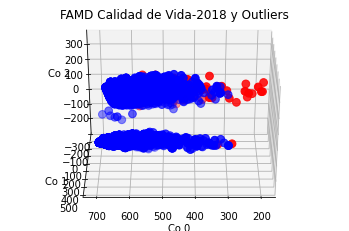

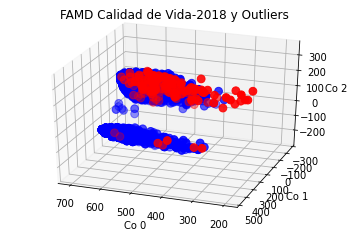

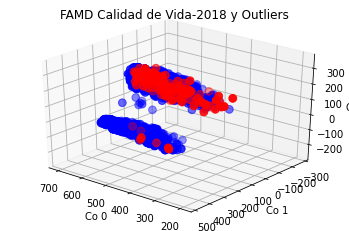

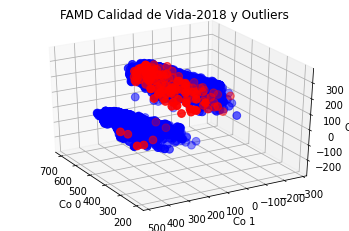

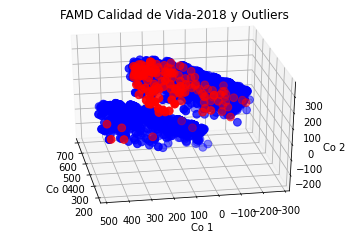

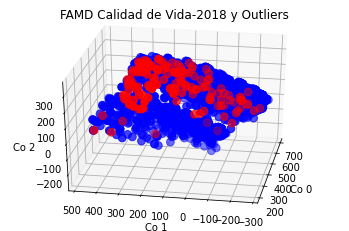

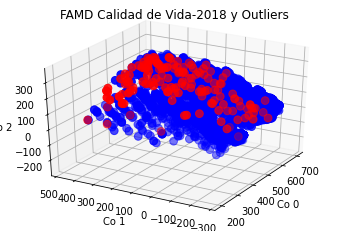

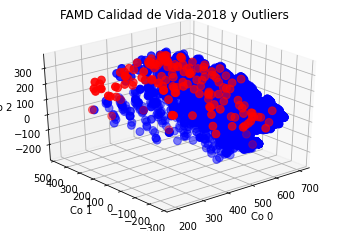

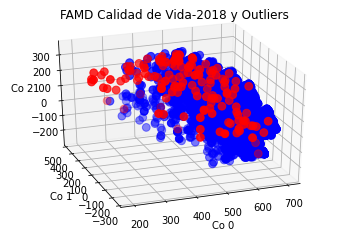

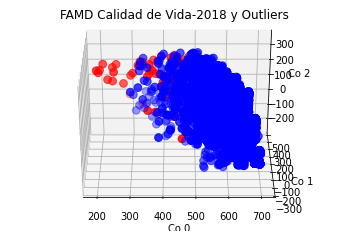

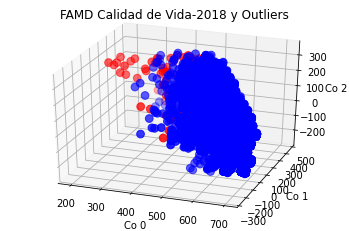

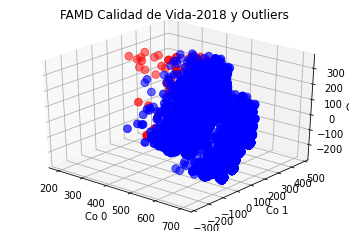

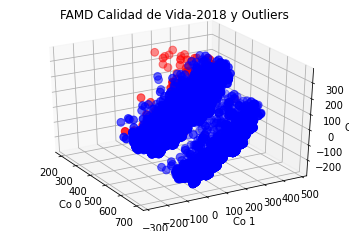

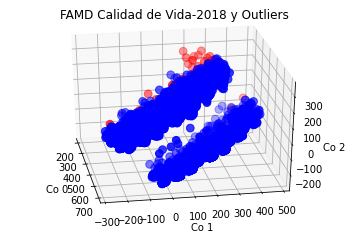

In [25]:
for angle in range(90,370,20):
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, y1, z1, c='b', cmap="Set2_r", s=60)
    ax.scatter(x2, y2, z2, c='r', cmap="Set2_r", s=60)

    # make simple, bare axis lines through space:
   # xAxisLine = ((min(x1), max(x1)), (0, 0), (0,0))
   # ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
   # yAxisLine = ((0, 0), (min(y1), max(y1)), (0,0))
   # ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
   # zAxisLine = ((0, 0), (0,0), (min(z1), max(z1)))
   # ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
    
    ax.view_init(30,angle)

    # label the axes
    ax.set_xlabel("Co 0")
    ax.set_ylabel("Co 1")
    ax.set_zlabel("Co 2")
    ax.set_title("FAMD Calidad de Vida-2018 y Outliers")
    filename= '/content/gdrive/My Drive/calidad_de_vida_medellin/github/Code/Modeling/3D-graphs/w-outliers/'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)

In [26]:
def make_gif(input_folder, save_filepath):
    episode_frames = []
    time_per_step = 0.25
    for root, _, files in os.walk(input_folder):
        file_paths = [os.path.join(root, file) for file in files]
        #sorted by modified time
        file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))
        episode_frames = [imageio.imread(file_path) 
                          for file_path in file_paths if file_path.endswith('.png')]
    episode_frames = np.array(episode_frames)
    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)

In [27]:
make_gif('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Code/Modeling/3D-graphs/w-outliers', '/content/gdrive/My Drive/calidad_de_vida_medellin/github/Code/Modeling/3D-graphs/con-outliers.gif') 
make_gif('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Code/Modeling/3D-graphs/only-data', '/content/gdrive/My Drive/calidad_de_vida_medellin/github/Code/Modeling/3D-graphs/only-data.gif') 

In [28]:
c_t.to_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Data/Other/R1-FAMD-total.csv', sep=';')

Nuevamente se corre FAMD, pero con 17 componentes, las cuales explican el 85% de inercia o variabilidad, y sobre el dataframe que no contiene los outliers. De igual forma, se conservan las 100 iteraciones, del primer cálculo de FAMD

In [29]:
famd_2 = prince.FAMD(
     n_components=17,
     n_iter=100,
     copy=True,
     check_input=True,
     engine='auto',       
     random_state=42)

In [30]:
famd_2 = famd_2.fit(dff.iloc[0:9040])

In [31]:
eigenvalues_2 = famd_2.eigenvalues_

In [32]:
eigfamd_2=famd_2.explained_inertia_
eigfamd_2[0:10]

[0.6210274016520311,
 0.03978430423515879,
 0.03044617619910574,
 0.023260568757278895,
 0.019441099762562322,
 0.01689114984398133,
 0.013553191141915097,
 0.013499366923425618,
 0.01245173638246631,
 0.009704323018415104]

##Inercia explicada por estas 17 componentes

In [33]:
sum(famd_2.explained_inertia_)

0.8501884046270686

Se construye el dataframe de los registros para las 17 componentes

In [34]:
famd_df = famd_2.transform(dff.iloc[0:9040])
famd_df=pd.DataFrame(famd_df)

In [35]:
famd_df.to_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Data/Results/R1-FAMD.csv', sep=";")